In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats, display, HTML
import os
from ipywidgets import interact,widgets
# add the new created feature
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,KBinsDiscretizer

In [2]:
data = pd.read_csv('./files/Zelestra-temperature-forecasting-train.csv',parse_dates=["Datetime"])
pd.concat([data.head(20), data.tail(20)]) # show the first and last 10 rows of the data

/tmp/ipykernel_433674/4244466699.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('./files/Zelestra-temperature-forecasting-train.csv',parse_dates=["Datetime"])


,ID,Datetime,City_ID,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent,Temperature
0,0,01/01/17 14:00,0,14.0,40.12,85,600.14,38.55,1024.5,-21.4,0.0,1.15,5.7,62.84,-0.323
1,1,01/01/17 15:00,0,12.0,65.59,84,2082.38,96.09,1025.1,-22.1,0.0,2.24,3.9,79.45,-0.570
2,2,01/01/17 16:00,0,6.0,58.87,83,1475.88,111.09,1025.3,-24.6,0.0,45.70,5.3,83.44,-1.008
3,3,01/01/17 17:00,0,5.0,84.67,84,2448.53,67.59,1026.2,-25.5,0.0,15.90,4.9,81.27,-1.234
4,4,01/01/17 18:00,0,5.0,83.66,77,2224.61,95.86,1027.1,-24.5,0.0,31.30,3.2,81.93,-1.704
5,5,01/01/17 19:00,0,3.0,21.69,77,2481.99,55.21,1027.5,-21.3,0.0,23.70,2.4,69.01,-2.222
6,6,01/01/17 20:00,0,4.0,76,62,577.18,55.86,1028.2,-20.4,0.0,23.39,2.2,69.91,-2.381
7,7,01/01/17 21:00,0,7.0,23.99,48,1980.23,86.75,1029.5,-20.4,0.0,38.53,3.0,72.48,-1.316
8,8,01/01/17 22:00,0,6.0,51.71,46,742.59,111.49,1030.4,-21.2,0.0,28.94,4.6,82.66,-0.136
9,9,01/01/17 23:00,0,14.0,53.9,68,2405.1,116.58,1030.5,-23.3,0.0,29.75,5.5,40.24,0.489


In [3]:
data.describe() # show the summary statistics of the data

,ID,City_ID,Particulate_matter,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent,Temperature
count,56000.000000,56000.000000,55340.000000,56000.000000,56000.000000,56000.000000,56000.000000,55784.000000,56000.000000,56000.000000,56000.000000
mean,31521.500000,0.500000,110.548066,143.438337,1012.431143,1.940343,0.055943,49.601420,1.899418,45.653169,13.578780
std,19296.643919,0.500004,95.174784,76.744127,10.121543,13.731029,0.687729,24.989324,1.324907,17.302524,11.251614
min,0.000000,0.000000,2.000000,2.000000,987.100000,-35.300000,0.000000,0.000000,0.000000,15.000000,-16.779000
25%,13999.750000,0.000000,39.000000,80.367500,1004.275000,-9.200000,0.000000,31.020000,1.000000,32.940000,3.446750
50%,31521.500000,0.500000,88.000000,153.380000,1012.100000,2.100000,0.000000,49.520000,1.500000,44.100000,14.531000
75%,49043.250000,1.000000,152.000000,210.780000,1020.600000,14.500000,0.000000,67.190000,2.500000,59.332500,23.045000
max,63043.000000,1.000000,995.000000,269.990000,1042.000000,28.800000,36.600000,99.990000,10.500000,85.000000,41.272000


In [4]:
data.info() # show the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  56000 non-null  int64  
 1   Datetime            56000 non-null  object 
 2   City_ID             56000 non-null  int64  
 3   Particulate_matter  55340 non-null  float64
 4   SO2_concentration   56000 non-null  object 
 5   O3_concentration    55198 non-null  object 
 6   CO_concentration    56000 non-null  object 
 7   NO2_concentration   56000 non-null  float64
 8   Presure             56000 non-null  float64
 9   Dew_point           56000 non-null  float64
 10  Precipitation       56000 non-null  float64
 11  Anonymous_X1        55784 non-null  float64
 12  Wind_speed          56000 non-null  float64
 13  Moisture_percent    56000 non-null  float64
 14  Temperature         56000 non-null  float64
dtypes: float64(9), int64(2), object(4)
memory usage: 6.4+

In [5]:
for col in data.columns:
    if col == 'Datetime':
        data[col] = pd.to_datetime(data[col], errors='coerce')
        print('Datetime column')
    else:
        data[col] = pd.to_numeric(data[col], errors='coerce')   
data.isna().sum() # show the number of missing values in each column    

/tmp/ipykernel_433674/3599169222.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce')


Datetime column


ID                      0
Datetime              106
City_ID                 0
Particulate_matter    660
SO2_concentration      47
O3_concentration      913
CO_concentration       60
NO2_concentration       0
Presure                 0
Dew_point               0
Precipitation           0
Anonymous_X1          216
Wind_speed              0
Moisture_percent        0
Temperature             0
dtype: int64

In [6]:
temperature_df = data.dropna(axis=0,inplace=False)
temperature_df.isna().sum() # show the number of missing values in each column    

ID                    0
Datetime              0
City_ID               0
Particulate_matter    0
SO2_concentration     0
O3_concentration      0
CO_concentration      0
NO2_concentration     0
Presure               0
Dew_point             0
Precipitation         0
Anonymous_X1          0
Wind_speed            0
Moisture_percent      0
Temperature           0
dtype: int64

In [7]:
temperature_df.describe(exclude='number') # show the summary statistics of the data

,Datetime
count,54493
mean,2018-08-11 10:22:18.050758912
min,2017-01-01 14:00:00
25%,2017-10-19 04:00:00
50%,2018-08-07 12:00:00
75%,2019-05-25 17:00:00
max,2020-12-03 23:00:00


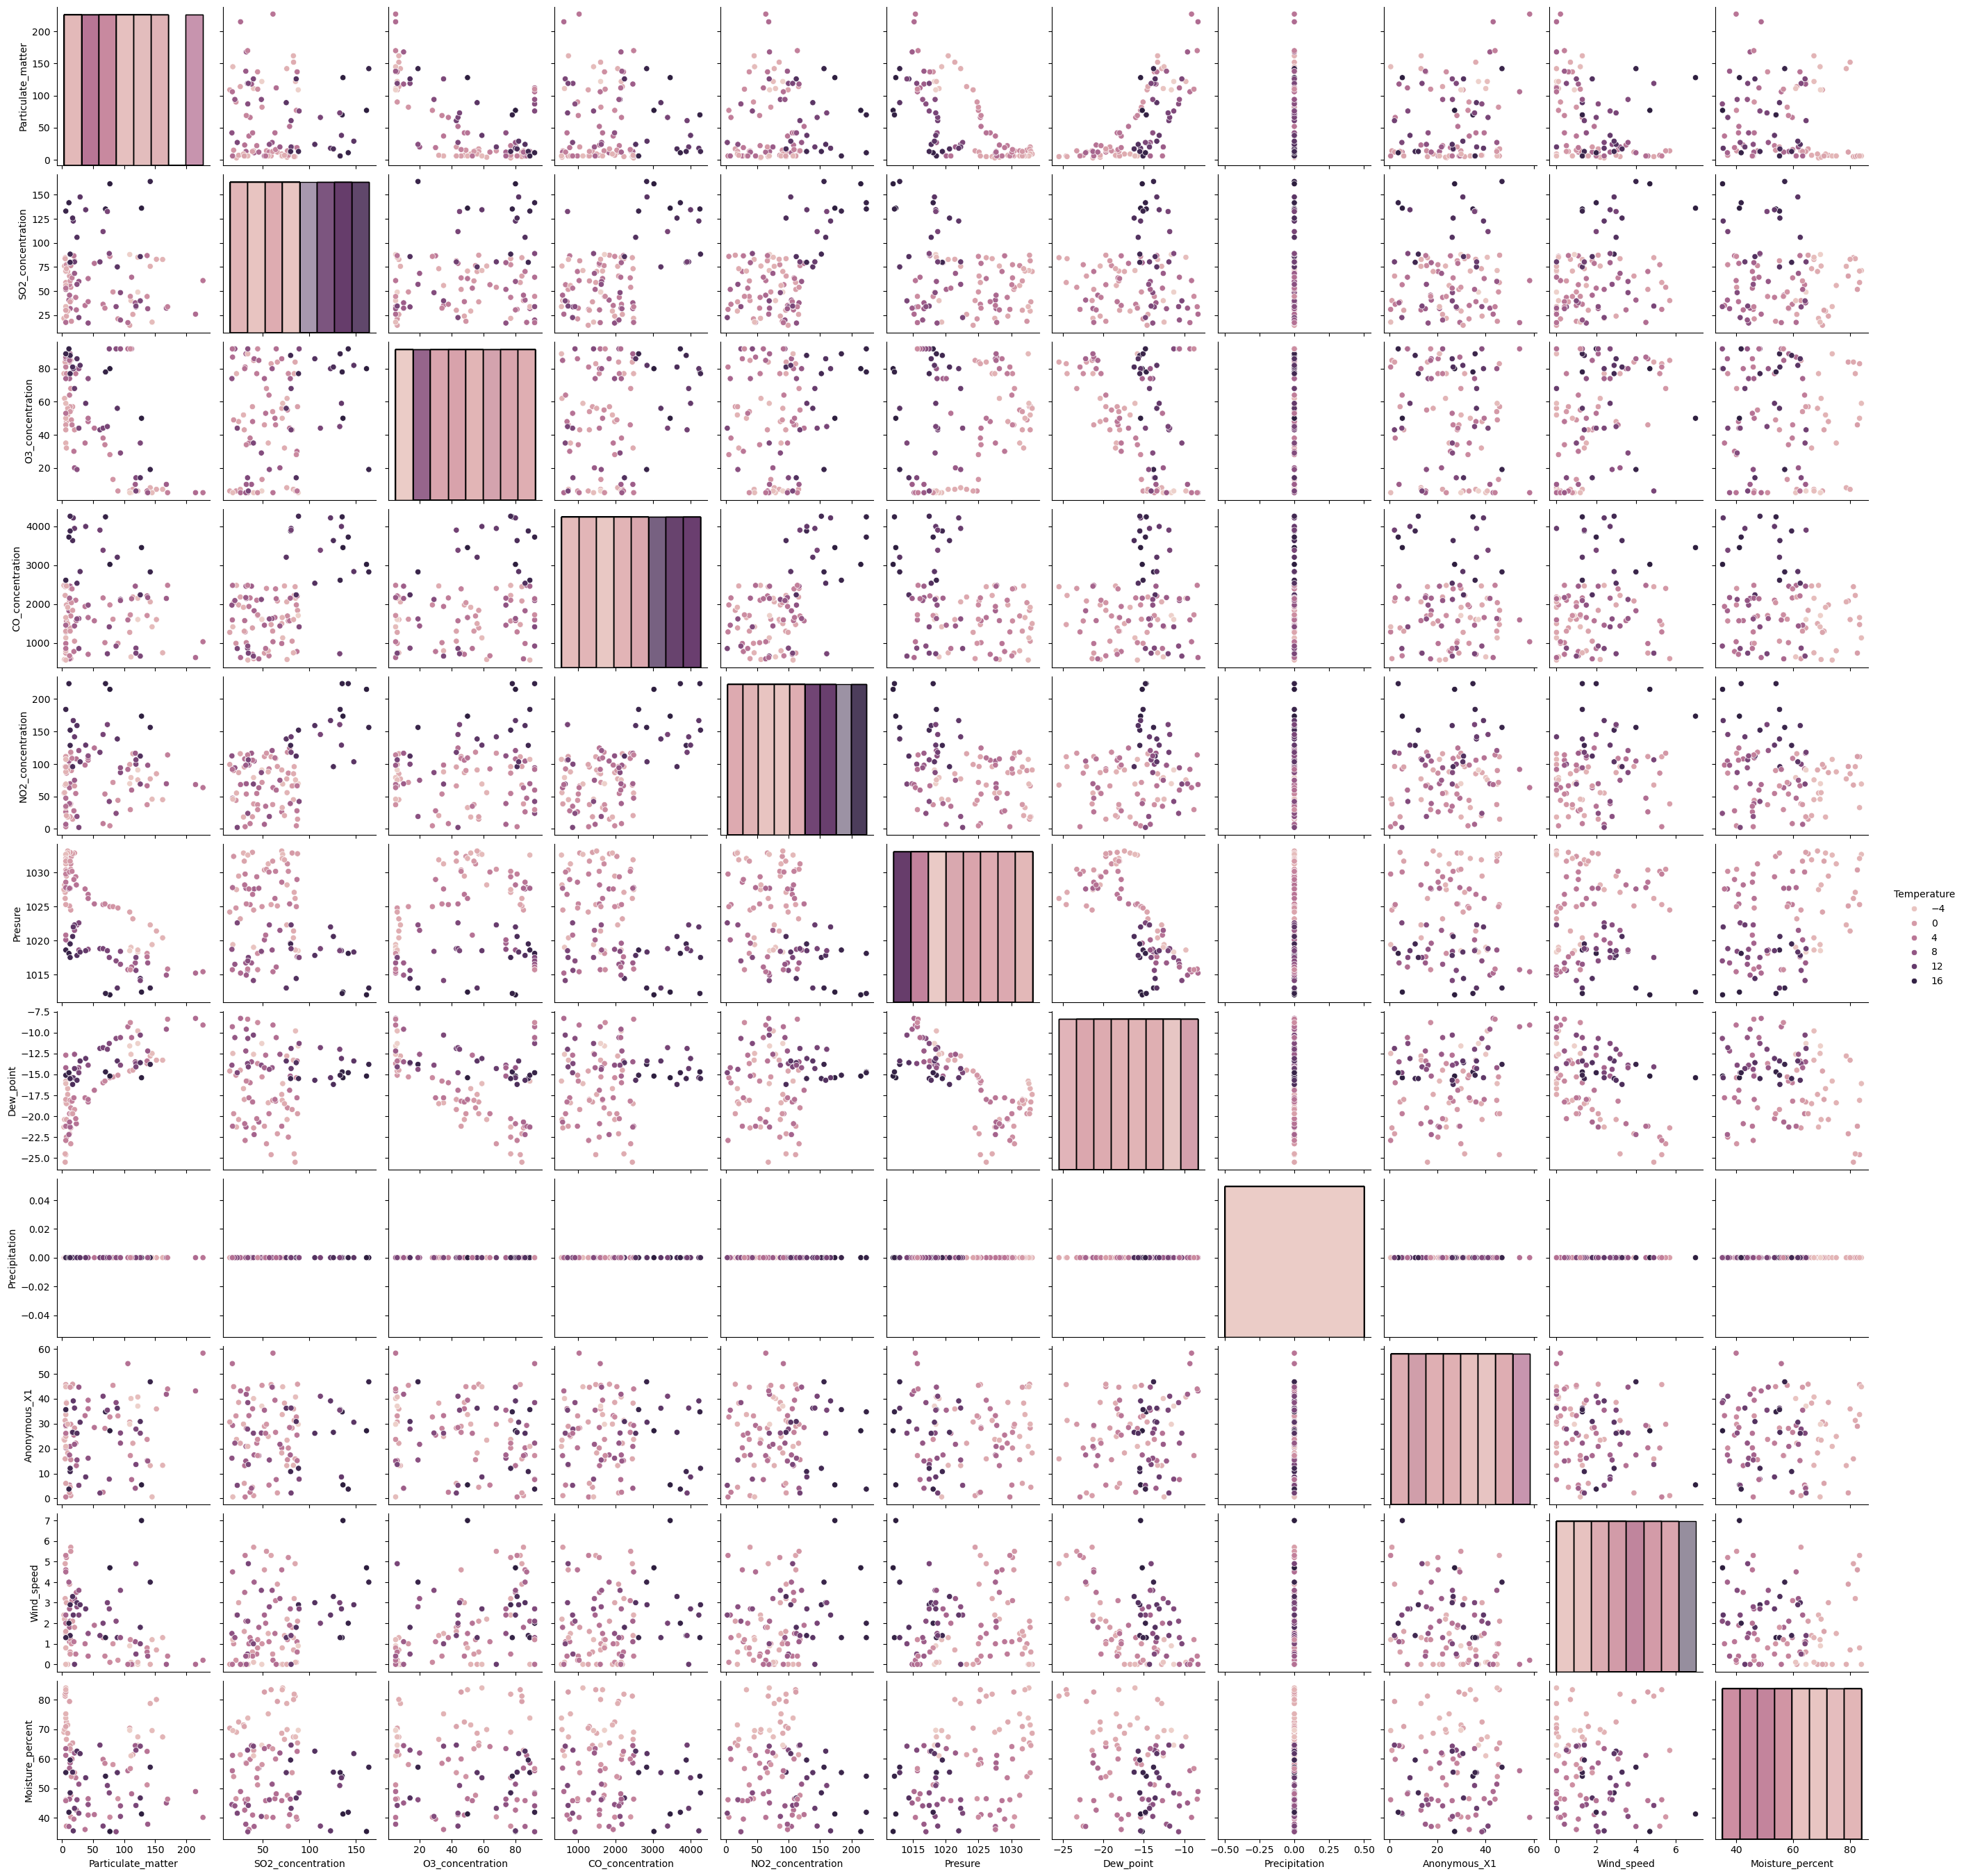

In [8]:
graph_df = temperature_df.drop(['Datetime','City_ID','ID'],axis=1,inplace=False) # drop the columns that are not needed
# graph_df = graph_df[['Particulate_matter','SO2_concentration','NO2_concentration','Temperature']].head(1000)
graph_df = graph_df.head(100)
sns.pairplot(graph_df,hue="Temperature", diag_kind='hist') # show the pairplot of the data

In [9]:
from sklearn.manifold import TSNE
m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(graph_df)
tsne_features[1:4,:]

array([[ 2.960439  , -4.409263  ],
       [-0.23551089, -0.30399963],
       [ 4.3235426 , -6.204914  ]], dtype=float32)

In [10]:
graph_df['x']= tsne_features[:,0]
graph_df['y']= tsne_features[:,1] 

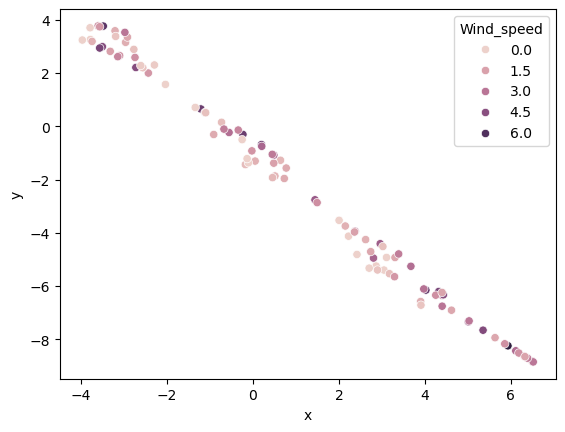

In [11]:
import seaborn as sns
sns.scatterplot(x="x", y="y", hue="Wind_speed", data=graph_df) # show the scatter plot of the data
plt.show()

In [12]:
graph_df = temperature_df.drop(['Datetime','City_ID','ID'],axis=1,inplace=False) 
print(graph_df.columns)
print(graph_df.shape)

Index(['Particulate_matter', 'SO2_concentration', 'O3_concentration',
       'CO_concentration', 'NO2_concentration', 'Presure', 'Dew_point',
       'Precipitation', 'Anonymous_X1', 'Wind_speed', 'Moisture_percent',
       'Temperature'],
      dtype='object')
(54493, 12)


### Creating a feature selector

In [13]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.5)
sel.fit(graph_df)
mask = sel.get_support()
print(f"mask: {mask}")
print(f"selected columns: {graph_df.columns[mask]}")


mask: [ True  True  True  True  True  True  True False  True  True  True  True]
selected columns: Index(['Particulate_matter', 'SO2_concentration', 'O3_concentration',
       'CO_concentration', 'NO2_concentration', 'Presure', 'Dew_point',
       'Anonymous_X1', 'Wind_speed', 'Moisture_percent', 'Temperature'],
      dtype='object')


In [14]:
reduced_df = graph_df.loc[:,mask]
print(reduced_df.shape)

(54493, 11)


<Axes: >

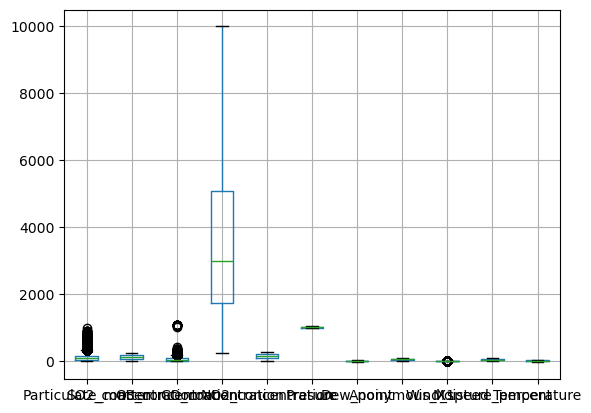

In [15]:
reduced_df.boxplot() # show the boxplot of the data

In [16]:
# Normalize the data
normalized_df = graph_df / graph_df.mean()
normalized_df.var()

Particulate_matter      0.738864
SO2_concentration       0.324599
O3_concentration        0.990267
CO_concentration        0.371265
NO2_concentration       0.286081
Presure                 0.000100
Dew_point              49.348730
Precipitation         152.528782
Anonymous_X1            0.254061
Wind_speed              0.485645
Moisture_percent        0.143743
Temperature             0.685253
dtype: float64

In [17]:
sel = VarianceThreshold(threshold=0.000100)
sel.fit(graph_df / graph_df.mean())
mask = sel.get_support()                
reduced_df = graph_df.loc[:, mask]
print(reduced_df.shape)
print(reduced_df.columns)

(54493, 11)
Index(['Particulate_matter', 'SO2_concentration', 'O3_concentration',
       'CO_concentration', 'NO2_concentration', 'Dew_point', 'Precipitation',
       'Anonymous_X1', 'Wind_speed', 'Moisture_percent', 'Temperature'],
      dtype='object')


### Correlation matrix

In [18]:
graph_df.corr()

,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent,Temperature
Particulate_matter,1.000000,-0.085074,-0.116840,-0.090964,-0.081092,-0.049307,0.095020,-0.025893,0.016145,-0.183089,0.086831,-0.091695
SO2_concentration,-0.085074,1.000000,0.543091,0.804046,0.885831,-0.741546,0.736339,0.031706,0.640406,0.033666,-0.665716,0.892713
O3_concentration,-0.116840,0.543091,1.000000,0.539713,0.530620,-0.442329,0.298330,0.026706,0.302798,0.292575,-0.455091,0.586394
CO_concentration,-0.090964,0.804046,0.539713,1.000000,0.790855,-0.717387,0.703261,0.034495,0.605312,0.024362,-0.713211,0.855130
NO2_concentration,-0.081092,0.885831,0.530620,0.790855,1.000000,-0.727279,0.722160,0.032796,0.665535,0.031131,-0.653850,0.877056
Presure,-0.049307,-0.741546,-0.442329,-0.717387,-0.727279,1.000000,-0.757736,-0.060695,-0.603921,0.048353,0.666844,-0.829377
Dew_point,0.095020,0.736339,0.298330,0.703261,0.722160,-0.757736,1.000000,0.089527,0.756259,-0.294095,-0.649297,0.809073
Precipitation,-0.025893,0.031706,0.026706,0.034495,0.032796,-0.060695,0.089527,1.000000,0.064286,0.005215,-0.034980,0.036895
Anonymous_X1,0.016145,0.640406,0.302798,0.605312,0.665535,-0.603921,0.756259,0.064286,1.000000,-0.169613,-0.524949,0.670534
Wind_speed,-0.183089,0.033666,0.292575,0.024362,0.031131,0.048353,-0.294095,0.005215,-0.169613,1.000000,-0.030779,0.039711


<Axes: >

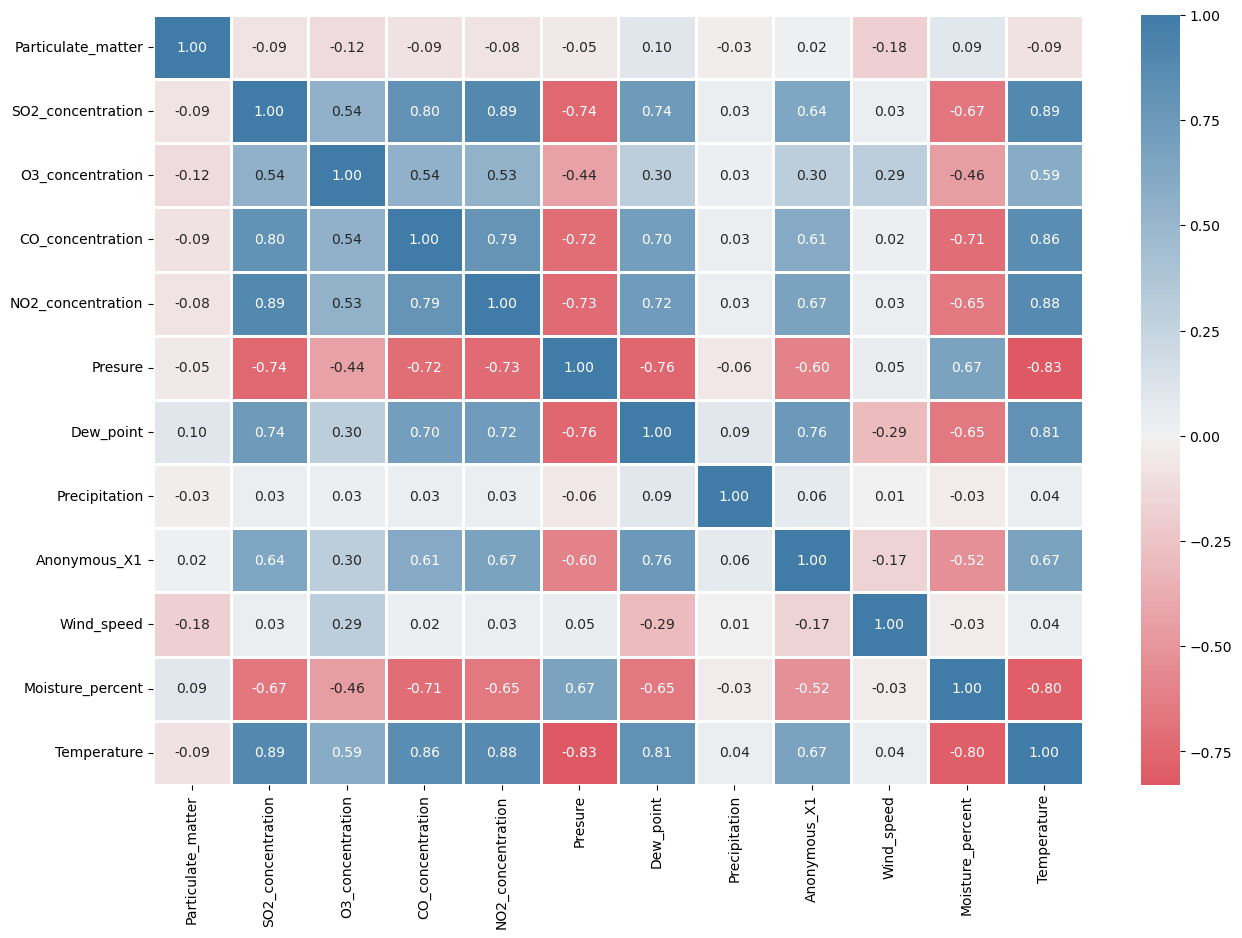

In [19]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
plt.figure(figsize=(15,10))
sns.heatmap(graph_df.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")


### Visualizing the correlation matrix

<Axes: >

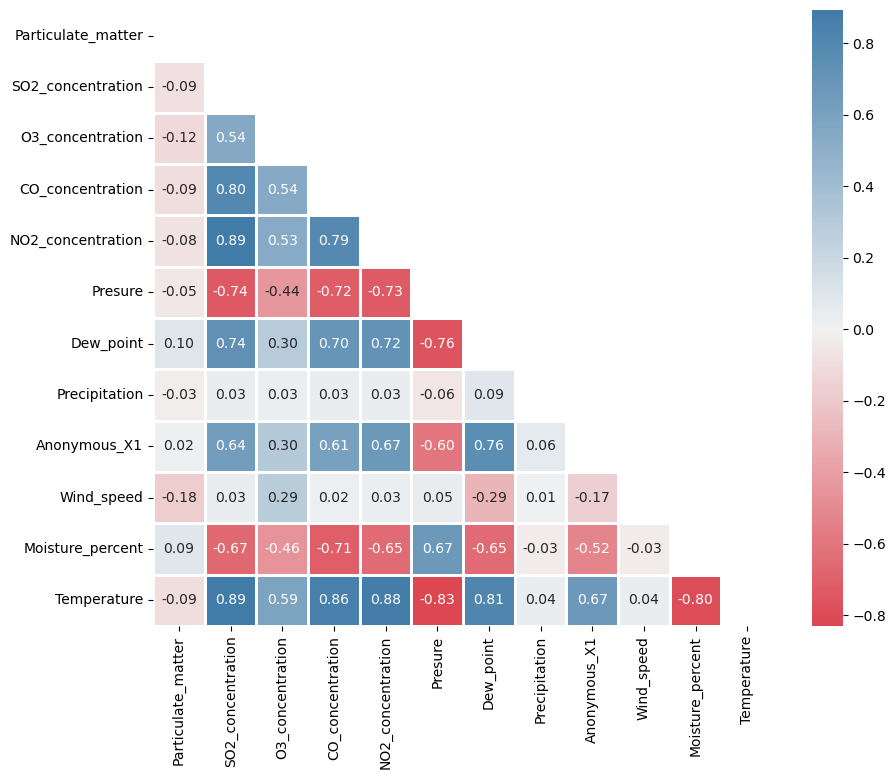

In [20]:
mask = np.triu(np.ones_like(graph_df.corr(), dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(graph_df.corr(), mask=mask, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

### Removing highly correlated features

In [21]:
# Create positive correlation matrix
corr_df = graph_df.corr().abs()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)
tri_df

,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent,Temperature
Particulate_matter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SO2_concentration,0.085074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O3_concentration,0.116840,0.543091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_concentration,0.090964,0.804046,0.539713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NO2_concentration,0.081092,0.885831,0.530620,0.790855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Presure,0.049307,0.741546,0.442329,0.717387,0.727279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dew_point,0.095020,0.736339,0.298330,0.703261,0.722160,0.757736,NaN,NaN,NaN,NaN,NaN,NaN
Precipitation,0.025893,0.031706,0.026706,0.034495,0.032796,0.060695,0.089527,NaN,NaN,NaN,NaN,NaN
Anonymous_X1,0.016145,0.640406,0.302798,0.605312,0.665535,0.603921,0.756259,0.064286,NaN,NaN,NaN,NaN
Wind_speed,0.183089,0.033666,0.292575,0.024362,0.031131,0.048353,0.294095,0.005215,0.169613,NaN,NaN,NaN


In [22]:
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.85)]
to_drop

['SO2_concentration', 'CO_concentration', 'NO2_concentration']

In [23]:
# X = temperature_df.drop(['City_ID','ID','Temperature','CO_concentration', 'NO2_concentration'],axis=1,inplace=False)
X = temperature_df.drop(['City_ID','ID','Temperature'],axis=1,inplace=False)
Y = temperature_df['Temperature']
# X['Year'] =  X['Datetime'].dt.year
# X['Month'] = X['Datetime'].dt.month
X.drop(['Datetime'],axis=1,inplace=True)

In [24]:
X.isna().sum()  

Particulate_matter    0
SO2_concentration     0
O3_concentration      0
CO_concentration      0
NO2_concentration     0
Presure               0
Dew_point             0
Precipitation         0
Anonymous_X1          0
Wind_speed            0
Moisture_percent      0
dtype: int64

In [25]:
X.head(20)

,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent
0,14.0,40.12,85.0,600.14,38.55,1024.5,-21.4,0.0,1.15,5.7,62.84
1,12.0,65.59,84.0,2082.38,96.09,1025.1,-22.1,0.0,2.24,3.9,79.45
2,6.0,58.87,83.0,1475.88,111.09,1025.3,-24.6,0.0,45.70,5.3,83.44
3,5.0,84.67,84.0,2448.53,67.59,1026.2,-25.5,0.0,15.90,4.9,81.27
4,5.0,83.66,77.0,2224.61,95.86,1027.1,-24.5,0.0,31.30,3.2,81.93
5,3.0,21.69,77.0,2481.99,55.21,1027.5,-21.3,0.0,23.70,2.4,69.01
6,4.0,76.00,62.0,577.18,55.86,1028.2,-20.4,0.0,23.39,2.2,69.91
7,7.0,23.99,48.0,1980.23,86.75,1029.5,-20.4,0.0,38.53,3.0,72.48
8,6.0,51.71,46.0,742.59,111.49,1030.4,-21.2,0.0,28.94,4.6,82.66
9,14.0,53.90,68.0,2405.10,116.58,1030.5,-23.3,0.0,29.75,5.5,40.24


In [26]:
Y.head(20)

0    -0.323
1    -0.570
2    -1.008
3    -1.234
4    -1.704
5    -2.222
6    -2.381
7    -1.316
8    -0.136
9     0.489
10    1.503
11    2.991
12    4.137
13    5.046
14    6.241
15    6.103
16    5.709
17    4.411
18    3.388
19    3.076
Name: Temperature, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)   

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,Y_train)

print(f"Actual coefficients: {lr.coef_  }")
print(f"Actual intercept: {lr.intercept_}")
print(lr.score(X_test, Y_test))
lr_mask = lr.coef_ != 0



Actual coefficients: [-0.00508706  0.03240218  0.01823988  0.00058736  0.02450783 -0.17263658
  0.19904399 -0.28892889 -0.01051627  0.49455588 -0.11330709]
Actual intercept: 182.63655500632257
0.9321522430885032


In [29]:
y_pred= lr.predict(X_test)

Mean squared error: 8.570041075668914


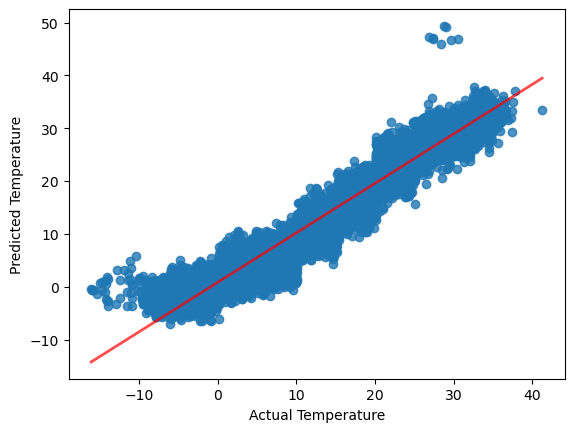

In [30]:
from sklearn.metrics import mean_squared_error
print(f"Mean squared error: {mean_squared_error(Y_test, y_pred)}")  
sns.regplot(x=Y_test, y=y_pred, ci=None, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.show()  

In [31]:
from sklearn.metrics import mean_absolute_error
print(f"Mean absolute error: {mean_absolute_error(Y_test, y_pred)}")

Mean absolute error: 2.2793978188803523


In [32]:
from sklearn.linear_model import Lasso

la = Lasso(alpha=0.05)
la.fit(X_train,Y_train)
print(f"Actual coefficients: {la.coef_  }") 
print(f"Actual intercept: {la.intercept_}")
print(la.score(X_test, Y_test))
la_mask = la.coef_ != 0


Actual coefficients: [-0.005051    0.03267613  0.01842047  0.0005925   0.02463482 -0.17213754
  0.19398296 -0.18736687 -0.01014301  0.4478816  -0.11380941]
Actual intercept: 182.14331709210396
0.9320623921967924


In [33]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=0.05)
r.fit(X_train,Y_train)
print(f"Actual coefficients: {r.coef_  }")
print(f"Actual intercept: {r.intercept_}")
print(r.score(X_test, Y_test))
r_mask = r.coef_ != 0

Actual coefficients: [-0.00508706  0.03240218  0.01823988  0.00058736  0.02450783 -0.17263659
  0.19904394 -0.28892811 -0.01051627  0.4945553  -0.1133071 ]
Actual intercept: 182.6365573191621
0.9321522426747058


In [34]:
from sklearn.linear_model import LassoCV
lcv = LassoCV()
lcv.fit(X_train,Y_train)
print(f"Actual coefficients: {lcv.coef_  }")
print(f"Actual intercept: {lcv.intercept_}")
print(lcv.score(X_test, Y_test))
print(f"Actual alpha: {lcv.alpha_}")
lcv_mask = lcv.coef_ != 0    

Actual coefficients: [-0.          0.0492051   0.00834054  0.00185804  0.03546485 -0.
  0.          0.          0.         -0.         -0.03634045]
Actual intercept: -2.9562567957844283
0.8805331056762968
Actual alpha: 20.4348284155723


In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe_lr = RFE(estimator=LinearRegression(), n_features_to_select=8,step=5,verbose=1) 
rfe_lr.fit(X_train,Y_train)
lr_mask = rfe_lr.support_
lr_ranking = rfe_lr.ranking_
print(X.loc[:,rfe_lr.ranking_ == 1].columns)
X.loc[:,lr_mask]


Fitting estimator with 11 features.
Index(['SO2_concentration', 'O3_concentration', 'NO2_concentration', 'Presure',
       'Dew_point', 'Precipitation', 'Wind_speed', 'Moisture_percent'],
      dtype='object')


,SO2_concentration,O3_concentration,NO2_concentration,Presure,Dew_point,Precipitation,Wind_speed,Moisture_percent
0,40.12,85.0,38.55,1024.5,-21.4,0.0,5.7,62.84
1,65.59,84.0,96.09,1025.1,-22.1,0.0,3.9,79.45
2,58.87,83.0,111.09,1025.3,-24.6,0.0,5.3,83.44
3,84.67,84.0,67.59,1026.2,-25.5,0.0,4.9,81.27
4,83.66,77.0,95.86,1027.1,-24.5,0.0,3.2,81.93
...,...,...,...,...,...,...,...,...
55995,232.74,128.0,240.01,1004.3,4.4,0.0,2.1,16.09
55996,241.44,154.0,254.33,1003.3,4.2,0.0,2.3,20.69
55997,220.01,172.0,233.80,1002.6,5.1,0.0,2.4,26.70
55998,206.98,170.0,263.99,1002.1,5.9,0.0,3.2,39.27


In [36]:
from sklearn.ensemble import RandomForestRegressor
rfe_rf = RFE(estimator=RandomForestRegressor(), n_features_to_select=8,step=5,verbose=1)
rfe_rf.fit(X_train,Y_train)
rf_mask = rfe_rf.support_
rf_ranking = rfe_rf.ranking_
X.loc[:,rf_mask]

Fitting estimator with 11 features.


,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Moisture_percent
0,14.0,40.12,85.0,600.14,38.55,1024.5,-21.4,62.84
1,12.0,65.59,84.0,2082.38,96.09,1025.1,-22.1,79.45
2,6.0,58.87,83.0,1475.88,111.09,1025.3,-24.6,83.44
3,5.0,84.67,84.0,2448.53,67.59,1026.2,-25.5,81.27
4,5.0,83.66,77.0,2224.61,95.86,1027.1,-24.5,81.93
...,...,...,...,...,...,...,...,...
55995,103.0,232.74,128.0,6075.55,240.01,1004.3,4.4,16.09
55996,75.0,241.44,154.0,6080.48,254.33,1003.3,4.2,20.69
55997,63.0,220.01,172.0,5974.36,233.80,1002.6,5.1,26.70
55998,60.0,206.98,170.0,5741.71,263.99,1002.1,5.9,39.27


In [37]:
from sklearn.ensemble import GradientBoostingRegressor

rfe_gb = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=8,step=5,verbose=1)
rfe_gb.fit(X_train,Y_train)
gb_mask = rfe_gb.support_
gb_ranking = rfe_gb.ranking_
X.loc[:,gb_mask]

Fitting estimator with 11 features.


,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Wind_speed,Moisture_percent
0,40.12,85.0,600.14,38.55,1024.5,-21.4,5.7,62.84
1,65.59,84.0,2082.38,96.09,1025.1,-22.1,3.9,79.45
2,58.87,83.0,1475.88,111.09,1025.3,-24.6,5.3,83.44
3,84.67,84.0,2448.53,67.59,1026.2,-25.5,4.9,81.27
4,83.66,77.0,2224.61,95.86,1027.1,-24.5,3.2,81.93
...,...,...,...,...,...,...,...,...
55995,232.74,128.0,6075.55,240.01,1004.3,4.4,2.1,16.09
55996,241.44,154.0,6080.48,254.33,1003.3,4.2,2.3,20.69
55997,220.01,172.0,5974.36,233.80,1002.6,5.1,2.4,26.70
55998,206.98,170.0,5741.71,263.99,1002.1,5.9,3.2,39.27


In [38]:
from sklearn.tree import DecisionTreeRegressor

rfe_dt = RFE(estimator=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=3), n_features_to_select=8,step=5,verbose=1)
rfe_dt.fit(X_train,Y_train)
dt_mask = rfe_dt.support_
dt_ranking = rfe_dt.ranking_
X.loc[:,gb_mask]

Fitting estimator with 11 features.


,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Wind_speed,Moisture_percent
0,40.12,85.0,600.14,38.55,1024.5,-21.4,5.7,62.84
1,65.59,84.0,2082.38,96.09,1025.1,-22.1,3.9,79.45
2,58.87,83.0,1475.88,111.09,1025.3,-24.6,5.3,83.44
3,84.67,84.0,2448.53,67.59,1026.2,-25.5,4.9,81.27
4,83.66,77.0,2224.61,95.86,1027.1,-24.5,3.2,81.93
...,...,...,...,...,...,...,...,...
55995,232.74,128.0,6075.55,240.01,1004.3,4.4,2.1,16.09
55996,241.44,154.0,6080.48,254.33,1003.3,4.2,2.3,20.69
55997,220.01,172.0,5974.36,233.80,1002.6,5.1,2.4,26.70
55998,206.98,170.0,5741.71,263.99,1002.1,5.9,3.2,39.27


In [43]:
votes = np.sum([lr_mask, rf_mask, gb_mask,dt_mask], axis=0)
all_mask = votes > 3
X.loc[:,all_mask]

,SO2_concentration,NO2_concentration,Presure,Moisture_percent
0,40.12,38.55,1024.5,62.84
1,65.59,96.09,1025.1,79.45
2,58.87,111.09,1025.3,83.44
3,84.67,67.59,1026.2,81.27
4,83.66,95.86,1027.1,81.93
...,...,...,...,...
55995,232.74,240.01,1004.3,16.09
55996,241.44,254.33,1003.3,20.69
55997,220.01,233.80,1002.6,26.70
55998,206.98,263.99,1002.1,39.27


In [394]:
votes = np.sum([lr_ranking, rf_ranking, gb_ranking], axis=0)
all_mask = votes > 1
X.loc[:,all_mask]

NameError: name 'lr_ranking' is not defined

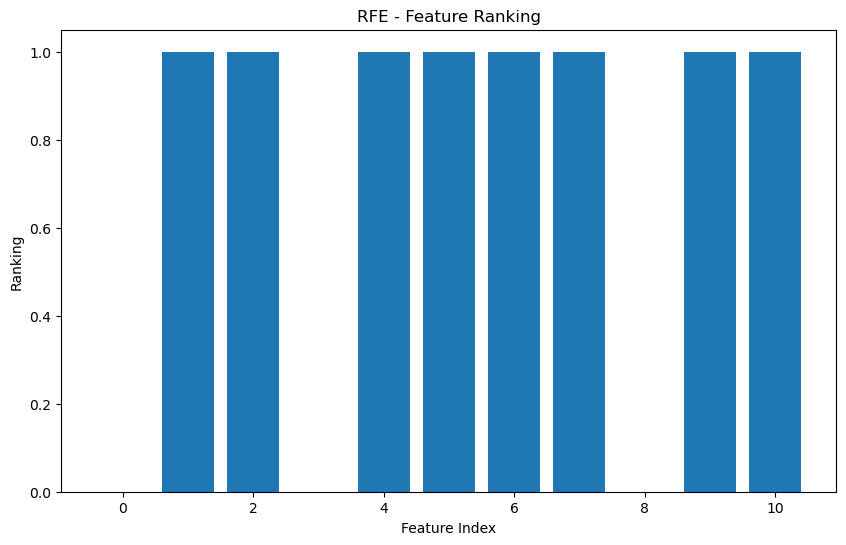

In [393]:
plt.figure(figsize=(10, 6))
plt.title("RFE - Feature Ranking")
plt.xlabel("Feature Index")
plt.ylabel("Ranking")
plt.bar(range(len(lr_mask)), lr_mask)
plt.show()